In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' #svg
import pylab as plb # this notebook is for plotting
import numpy as np
import scipy as sp
import flylib as flb
import group_data as gd
plb.rcParams['pdf.fonttype'] = 42 #allows text in saved .pdf files to be edited in illustrator
plb.rcParams['image.interpolation'] = 'Nearest'
plb.rcParams['image.cmap'] = 'BrBG'
import warnings
warnings.filterwarnings('ignore')

In [4]:
import h5py
mtd_22H05 = h5py.File('open_loop_trial_db_22H05.hdf5','r')
#mtd = h5py.File('open_loop_trial_db_39E01.hdf5','r')

In [5]:
trial_names = np.array(mtd_22H05['selected_signals']['trial_names'])
def get_selection_mtrx(signal,trial):
    selection = trial_names == trial
    return np.array(mtd_22H05['normed_signals'][signal][selection,:])

In [6]:
trial = 'yaw_left'

In [269]:
i1 = np.array(mtd_22H05['normed_signals']['i1'])
i2 = np.array(mtd_22H05['normed_signals']['i2'])
b3 = np.array(mtd_22H05['normed_signals']['b3'])
b2 = np.array(mtd_22H05['normed_signals']['b3'])
b1 = np.array(mtd_22H05['normed_signals']['b1'])
iii3 = np.array(mtd_22H05['normed_signals']['iii3'])
hg1 = np.array(mtd_22H05['normed_signals']['hg1'])
hg4 = np.array(mtd_22H05['normed_signals']['hg4'])

In [270]:
import copy
rwing_rec = copy.copy(rwing)
rwing_rec[rwing_rec<0] = 0

In [271]:
from scipy import signal

In [272]:
lc = 0.5 #Hz low-cut
hc = 5.0 #Hz high-cut
thresh = 0.31461538461538463
example_signal = rwing[0]
import flylib as flb
sfc = flb.butter_bandpass_filter(example_signal,lc,hc,0.021)
lfc = flb.butter_lowpass_filter(example_signal,lc,0.021)
hfc = flb.butter_highpass_filter(example_signal,hc,0.021)

In [273]:
dta = np.vstack([i1[0],b2[0],b3[0],i2[0],b1[0],iii3[0],])
Y = np.vstack([lfc,hfc,sfc])

In [274]:
coef = np.dot(Y,np.linalg.pinv(dta))

In [275]:
fit = np.dot(coef,dta)#plb.plot(rwing[0])

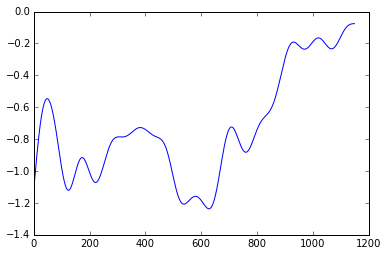

In [276]:
plb.plot(lfc)

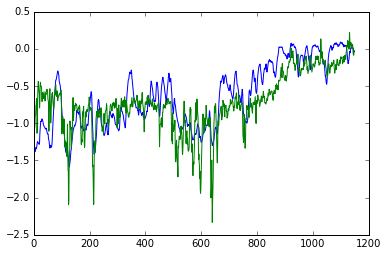

In [277]:
plb.plot(fit[0]+fit[1]+fit[2])
plb.plot(example_signal)
#plb.plot(hfc+sfc+lfc)

In [140]:
%config InlineBackend.figure_format = 'png'
plb.figure(figsize =(20,6))
cor = [scipy.signal.correlate(x,y) for x,y in zip(rwing,b3)]
#plb.gca().set_ybound(0,10)
#plb.gca().set_xbound(0.1,20)

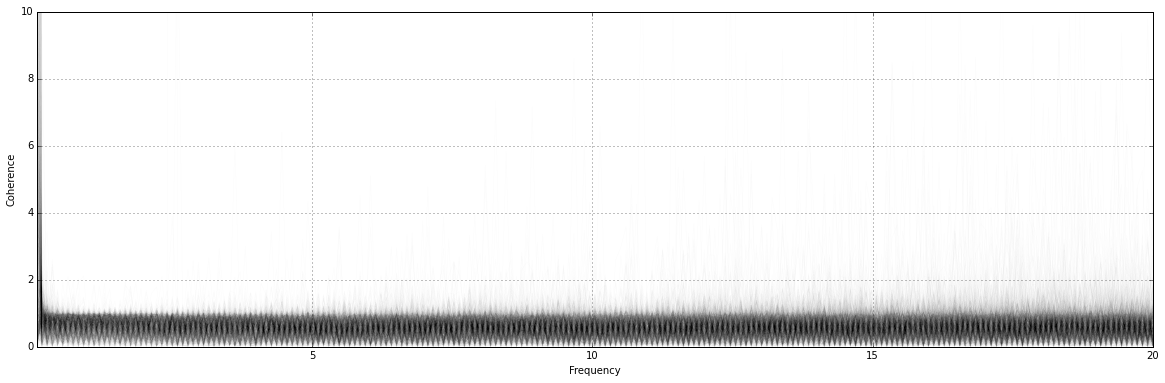

In [133]:
%config InlineBackend.figure_format = 'png'
plb.figure(figsize =(20,6))
cohr = [plb.matplotlib.pyplot.cohere(x,y,256*2,1/0.021,
                                     hold = True, 
                                     color = 'k', 
                                     alpha = 0.01,
                                     detrend = 'linear',) for x,y in zip(rwing,b3)]
plb.gca().set_ybound(0,10)

plb.gca().set_xbound(0.1,20)
#plb.gca().set_yscale('log')

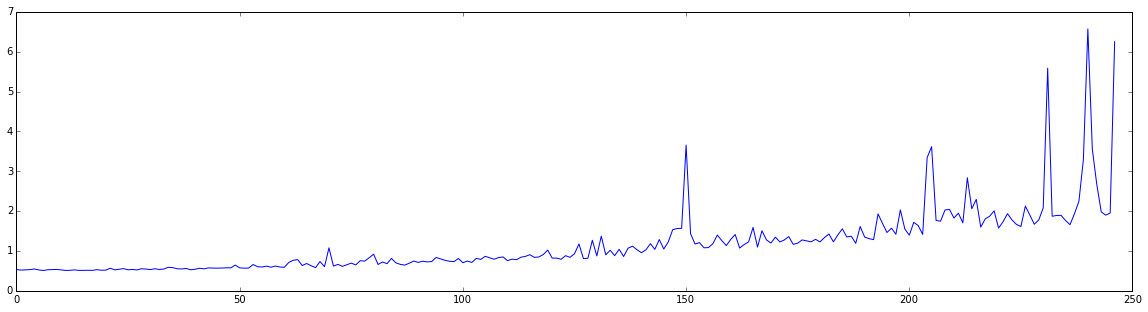

In [130]:
plb.figure(figsize = (20,5))
mn = np.nanmean([x[0] for x in cohr],axis = 0)[10:]
ub = np.nanstd([x[0] for x in cohr],axis = 0)[10:] + mn
lb = mn - np.nanstd([x[0] for x in cohr],axis = 0)[10:] 
plb.plot(mn)
#plb.plot(ub)
#plb.plot(lb)

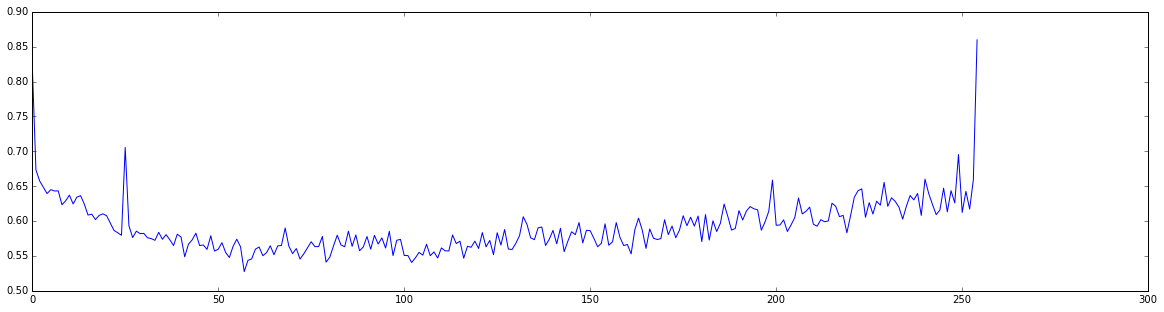

In [136]:
plb.figure(figsize = (20,5))
mn = np.nanmean([x[0] for x in cohr],axis = 0)[2:]
ub = np.nanstd([x[0] for x in cohr],axis = 0)[2:] + mn
lb = mn - np.nanstd([x[0] for x in cohr],axis = 0)[2:] 
plb.plot(mn)

In [78]:
?plb.matplotlib.pyplot.cohere

In [105]:
np.shape(cohr[0][0])

(257,)

In [115]:
np.nanmean([x[0] for x in cohr],axis =0)

array([  1.01615380e-28,   5.90923155e+03,   7.10550024e-01,
         6.14822570e-01,   5.40451561e-01,   5.45748304e-01,
         5.35909706e-01,   5.20588259e-01,   5.34632552e-01,
         5.44386179e-01,   5.32444438e-01,   5.19835170e-01,
         5.26550952e-01,   5.31551658e-01,   5.47180381e-01,
         5.23522804e-01,   5.09276031e-01,   5.28555908e-01,
         5.33140583e-01,   5.35481767e-01,   5.24647175e-01,
         5.10613606e-01,   5.14001347e-01,   5.24920125e-01,
         5.12174669e-01,   5.12016688e-01,   5.15113863e-01,
         5.11935353e-01,   5.30270549e-01,   5.16235213e-01,
         5.18861131e-01,   5.66096769e-01,   5.25151563e-01,
         5.42289598e-01,   5.56922666e-01,   5.27244562e-01,
         5.35137585e-01,   5.23458899e-01,   5.53379582e-01,
         5.44841640e-01,   5.32323479e-01,   5.53522992e-01,
         5.35118213e-01,   5.45876863e-01,   5.89903511e-01,
         5.81450104e-01,   5.52445082e-01,   5.48107406e-01,
         5.60419403e-01,

In [113]:
np.shape(i1)

(1111, 1150)